In [1]:
# This note book create a CNN wiith Convolutional layer and Pooling layer using numpy 
# This note book explains Convolution and Pooling at low level instead of using high level APIs of Keras

In [80]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [81]:
# Lets starts with a function for Zero padding first on bunch of images at onces. This function will be used in this learning

def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """
    X_pad = np.pad(X, ((0,0), (pad, pad), (pad, pad), (0,0)))
    
    return X_pad

x.shape =
 (4, 3, 3, 1)
x_pad.shape =
 (4, 9, 9, 1)
x[1,1] =
 [[-0.3224172 ]
 [-0.38405435]
 [ 1.13376944]]
x_pad[1,1] =
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


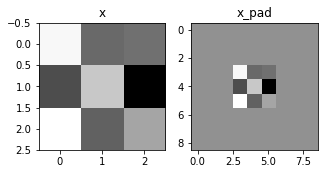

In [82]:
# Creating a bunch of images of size 3 * 3 with 1 channel, creating 4 such images
x = np.random.randn(4, 3, 3, 1)

# Padding all 4 images with 3 zeros hence size of image becoems 9*9 with 1 channels
x_pad = zero_pad(x, 3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
#Showing first line of images before and after padding
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

# Drawing image before and after padding
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])

In [83]:
def draw_shape(x):
    # Drawing image before and after padding
    plt.imshow(x)

In [84]:
# Making single step of convolution
# Will use this step in convoluting slice of image with filter and emit scaller quantity
def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """

    # Element-wise product between a_slice_prev and W. Do not add the bias yet.
    s = np.multiply(a_slice_prev, W)
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = Z + float(b)
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE

    return Z

In [85]:
np.random.seed(1)
# Create a slice of an image and run convolution on it. 
a_slice_prev = np.random.randn(4, 4, 3)
# Filter needs to be same as abvoe size as a_slice_prev is a portion not the complete image
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

# Do convolution and print scaller value
Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)


Z = -6.999089450680221


In [86]:
def conv_forward(A_prev, W, b, hparameters):
    """
    The forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    print(f"Input shape in Conv Layer {A_prev.shape}")
    print(f"Filter shape {W.shape}")
    print(f"Hyper parameters {hparameters}")
    
    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_F) = W.shape
    
    # Retrieve information from "hparameters"
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula . 
    n_H = int((n_H_prev - f + 2 * pad)/stride) + 1
    n_W = int((n_W_prev - f + 2 * pad)/stride) + 1
    print(f"Convolution output would be {n_H}*{n_W}")
    # Initialize the output volume Z with zeros
    Z = np.zeros((int(m), int(n_H), int(n_W), int(n_F)))
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    (m, n_H_P, n_W_P, n_C_P) = A_prev_pad.shape
    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        print(f"-----------------------Image-{i}------------------------ ")
        for h in range(0,n_H):
            v_start = h * stride
            v_end = v_start + f
            print(f"----------- Verticle={h} ---------")
            for w in range(0, n_W):
                print(f"------------ Horizontal-{w}-----------")
                horiz_start = w * stride
                horiz_end = horiz_start + f
                for c in range(0,n_F):
                    print(f"Filter-{c}")
                    a_slice_prev = a_prev_pad[v_start:v_end,horiz_start:horiz_end,0:n_C_P]
                    weights = W[0:f,0:f,0:n_C_P,c]
                    bias = b[0,0,0,c]                    
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, bias)

   
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [87]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print(f"Output convolution shape {Z.shape}")
z_mean = np.mean(Z)
z_0_2_1 = Z[0, 2, 1]
cache_0_1_2_3 = cache_conv[0][1][2][3]
print("Z's mean =\n", z_mean)
print("Z[0,2,1] =\n", z_0_2_1)
print("cache_conv[0][1][2][3] =\n", cache_0_1_2_3)

Input shape in Conv Layer (2, 5, 7, 4)
Filter shape (3, 3, 4, 8)
Hyper parameters {'pad': 1, 'stride': 2}
Convolution output would be 3*4
-----------------------Image-0------------------------ 
----------- Verticle=0 ---------
------------ Horizontal-0-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filter-5
Filter-6
Filter-7
------------ Horizontal-1-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filter-5
Filter-6
Filter-7
------------ Horizontal-2-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filter-5
Filter-6
Filter-7
------------ Horizontal-3-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filter-5
Filter-6
Filter-7
----------- Verticle=1 ---------
------------ Horizontal-0-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filter-5
Filter-6
Filter-7
------------ Horizontal-1-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filter-5
Filter-6
Filter-7
------------ Horizontal-2-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filt

In [88]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Tthe forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    print(f"Input shape in Pool Layer {A_prev.shape}")
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    print(f"Mode {mode}")
    print(f"Hyper parameters {hparameters}")
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    print(f"Output shape {A.shape}")      
    # Pooling logic starts here
    for i in range(0,m):
        a_prev = A_prev[i]
        for h in range(0,n_H):
            vert_start = h * stride
            vert_end = vert_start + f
            for w in range(0, n_W):
                h_start = w * stride
                h_end = h_start + f
                for c in range(0,n_C):
                    a_prev_slice = a_prev[vert_start:vert_end, h_start:h_end, c]
                    if mode == "max":
                        A[i,h,w,c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i,h,w,c] = np.mean(a_prev_slice)   
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
   
    return A, cache

In [89]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print(f"Output convolution shape {Z.shape}")
z_mean = np.mean(Z)
z_0_2_1 = Z[0, 2, 1]
cache_0_1_2_3 = cache_conv[0][1][2][3]
print("Z's mean =\n", z_mean)
print("Z[0,2,1] =\n", z_0_2_1)
print("cache_conv[0][1][2][3] =\n", cache_0_1_2_3)

hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(Z, hparameters, mode = "max")
print("A[0, 0] =\n", A[0, 0])
A, cache = pool_forward(Z, hparameters, mode = "average")
print("A[0, 0] =\n", A[0, 0])

Input shape in Conv Layer (2, 5, 7, 4)
Filter shape (3, 3, 4, 8)
Hyper parameters {'pad': 1, 'stride': 2}
Convolution output would be 3*4
-----------------------Image-0------------------------ 
----------- Verticle=0 ---------
------------ Horizontal-0-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filter-5
Filter-6
Filter-7
------------ Horizontal-1-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filter-5
Filter-6
Filter-7
------------ Horizontal-2-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filter-5
Filter-6
Filter-7
------------ Horizontal-3-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filter-5
Filter-6
Filter-7
----------- Verticle=1 ---------
------------ Horizontal-0-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filter-5
Filter-6
Filter-7
------------ Horizontal-1-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filter-5
Filter-6
Filter-7
------------ Horizontal-2-----------
Filter-0
Filter-1
Filter-2
Filter-3
Filter-4
Filt